In [36]:
import pandas as pd
import geopandas as gpd
import folium
import fiona

fiona.drvsupport.supported_drivers['KML'] = 'rw'
%matplotlib inline

In [18]:
df = pd.read_csv('example.csv')

In [21]:
df.columns

Index(['latitude', 'longitude'], dtype='object')

In [20]:
m1 = folium.Map([-23.5475000, -46.6361100], zoom_start=12, tiles='cartodbpositron')
m1

In [29]:
for point in range(1, 100):
    folium.CircleMarker(df.iloc[point][['latitude','longitude']],
                            radius = 6,
                            popup='Exemplo de texto: '+str(df.iloc[point,0]),
                            fill=True, # Set fill to True
                            color = 'grey',
                            fill_opacity=0.85).add_to(m1)
m1

In [34]:
poligonos=gpd.read_file('data/DistritosAdministrativos.kml')

In [39]:
poligonos.head(2)

,Name,Description,geometry
0,MANDAQUI,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(POLYGON Z ((-46.65471793567885 -23.4306520687...
1,MARSILAC,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",(POLYGON Z ((-46.60986701122582 -23.9055068089...


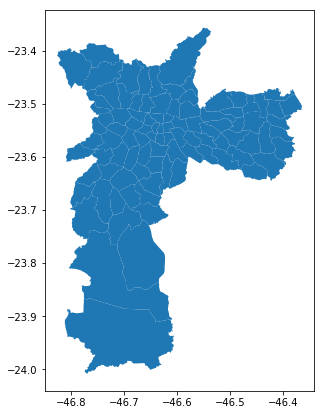

In [38]:
poligonos.plot(figsize=(7,7))

In [ ]:
# bairros['simple_geometry'] = bairros['geometry'].simplify(2e3, preserve_topology=True)

In [41]:
for i in range(10):
    folium.GeoJson(poligonos['geometry'].iloc[i],
                   tooltip=poligonos['Name'].iloc[i]).add_to(m1)

In [42]:
m1